# Movimiento de un proyectil

Autores: Juan Andrés Guarín, Angelica Angarita, Andrés Giovani Ferreira. \
Códigos: 2201870, 2200801, 2201764.

Este código se estructura de la siguiente manera:
    
1. Importación de librerias.
2. Guardando datos.
3. Determinación velocidad inicial.
4. Definiendo la función de ajuste.
5. Creando datos teóricos.
6. Grafica de datos.

## 1. Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 2. Guardando datos

In [2]:
data = pd.read_csv('Data_Movement_averages.csv', delimiter=',')

# Datos de la tabla

x = data['x [m]']
y = data['y [m]']
sigmay = data['sigmay [m]']

# Incertidumbres

dx = 0.001*np.ones(len(x))

# Seleccionamos el mayor valor entre la incertidumbre del instrumento
# y la desviación estándar de las 5 mediciones
dy = [max(sigmay[i], 0.001) for i in range(len(y))]

In [3]:
# Visualizando datos
data

,x [m],y [m],sigmay [m]
0,0.24,0.5020,0.000894
1,0.34,0.4762,0.000748
2,0.44,0.4418,0.001170
3,0.54,0.3874,0.001020
4,0.64,0.3328,0.000748


## 3. Determinación velocidad inicial

In [4]:
# Función
def func1(x, m, b):
    y = m * x + b
    return y

# Parametros y covarianza
params, covarianza = curve_fit(func1, x**2, y)
covarianza = np.sqrt(np.diag(covarianza))

# Calculo velocidad inicial teórica y su desviación estándar
vteorico= np.sqrt(9.8 / (2 * abs(params[0])))
dv = covarianza[0]*np.sqrt(9.8 / (8 * abs(params[0]**3)))
coefpearson = dv/vteorico*100

# Se comenta en pantalla
print('El valor de velocidad es: v0 = %.2f ± %.2f m/s,'%(vteorico, dv))
print('con un coeficiente de pearson de: %.2f'%(coefpearson), '%.')

El valor de velocidad es: v0 = 3.17 ± 0.04 m/s,
con un coeficiente de pearson de: 1.11 %.


## 4. Definiendo la función de ajuste

In [5]:
def func2(x, a, b, c):
    y = a * x**2 + b * x + c
    return y

params2, covarianza2 = curve_fit(func2, x, y)
v0 = np.sqrt(9.8 / (2 * abs(params2[0])))
theta0 = np.arctan(params2[1])
y0=params2[2]

xajuste = np.linspace(0.2, 0.7, 200)
yajuste = func2(xajuste, *params2)

## 5. Creando datos teóricos

In [6]:
def func(x, v0, theta0):
    g=9.8
    y0 = 0.517
    y = -g*x**2/(2*v0**2)+ np.tan(theta0)*x + y0 
    return y

xteoricos = np.linspace(0.2, 0.7, 200)
yteoricos = func(xteoricos, v0, theta0)

## 6. Grafica de datos

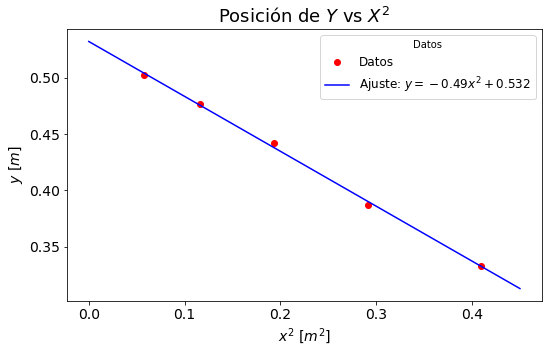

In [7]:
# Grafica de y vs x^2

## Creando datos
x1=np.linspace(0,0.45,100)
y1=func1(x1, *params)

## Graficando
plt.figure(figsize=(8.5, 5))
plt.plot(x**2, y, 'o', color='red', label='Datos')
plt.plot(x1, y1,'-b',label='Ajuste: $y = %.2fx^2 + %.3f$'%(-0.48667681,  0.53199417))


#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title(r'Posición de $Y$ vs $X^2$', fontsize = 18)
plt.legend(title= 'Datos', fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$y$ [$m$]', fontsize = 14)
plt.xlabel('$x^2$ [$m^2$]', fontsize = 14)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('y_versus_x^2.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

In [8]:
# Coeficiente de correlación R^2

R2 = np.corrcoef(x**2,y)[0,1]
print('R^2 = ',abs(R2))

R^2 =  0.9992650842238612


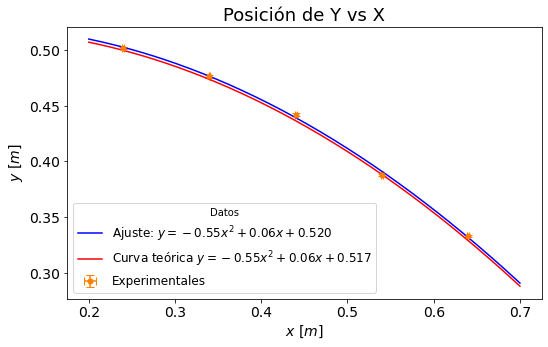

In [9]:
# Grafica de y vs x

plt.figure(figsize=(8.5, 5))
plt.errorbar(x, y, xerr= dx, yerr=dy, fmt='o', color='#FF8000', markersize=5, 
             capsize=4, ecolor = '#FF8000', label='Experimentales')


plt.plot(xajuste, yajuste,'-b',label='Ajuste: $y = %.2fx^2 + %.2fx + %.3f$'%(-0.55428565,  0.06057137,  0.51978401))
plt.plot(xteoricos, yteoricos,'-r',label='Curva teórica $y = %.2fx^2 + %.2fx + %.3f$'%(-9.8/(2*v0**2), np.tan(theta0), 0.517))


#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Posición de Y vs X', fontsize = 18)
plt.legend(title= 'Datos', fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$y$ [$m$]', fontsize = 14)
plt.xlabel('$x$ [$m$]', fontsize = 14)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('y_versus_x.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos